<a href="https://colab.research.google.com/github/Geethasaran/E-Commerce-_Employee-Attrition-Rate/blob/main/FINAL_PROJECT_Employee_Attrition_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Aim:**

The objective of this project is to help a company understand employee attrition within their organization in order to minimize the attrition rate, reduce turnover costs, and improve employee retention.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,7]
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/Geethasaran/E-Commerce-_Employee-Attrition-Rate/refs/heads/main/Attrition%20Data.csv')

In [4]:
df.shape

(1470, 13)

In [5]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


**Exploratory Data Analysis (EDA)**

**Check for Missing Values:**

In [8]:
print(df.isnull().sum())


Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


In [9]:
for i in df.select_dtypes(include='object').columns:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Attrition are:  2
The no.of unique values in Department are:  3
The no.of unique values in EducationField are:  6
The no.of unique values in MaritalStatus are:  3


In [10]:
for i in df.select_dtypes(include=np.number).columns:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Age are:  43
The no.of unique values in DistanceFromHome are:  29
The no.of unique values in Education are:  5
The no.of unique values in EnvironmentSatisfaction are:  4
The no.of unique values in JobSatisfaction are:  4
The no.of unique values in MonthlyIncome are:  1349
The no.of unique values in NumCompaniesWorked are:  10
The no.of unique values in WorkLifeBalance are:  4
The no.of unique values in YearsAtCompany are:  37


The columns 'Education','EnvironmentSatisfaction',''JobSatisfaction','WorkLifeBalance' have very less unique values, hence change the datatype to 'object.

In [11]:
change_dtype = ['Education','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']
for i in change_dtype:
    df[i] = df[i].astype('object')

In [12]:
df.dtypes

,0
Age,int64
Attrition,object
Department,object
DistanceFromHome,int64
Education,object
EducationField,object
EnvironmentSatisfaction,object
JobSatisfaction,object
MaritalStatus,object
MonthlyIncome,int64


# **1.Univariate Analysis**

In [13]:
cat = df.select_dtypes(include='object').columns
len(cat)

8

**CountPlot**

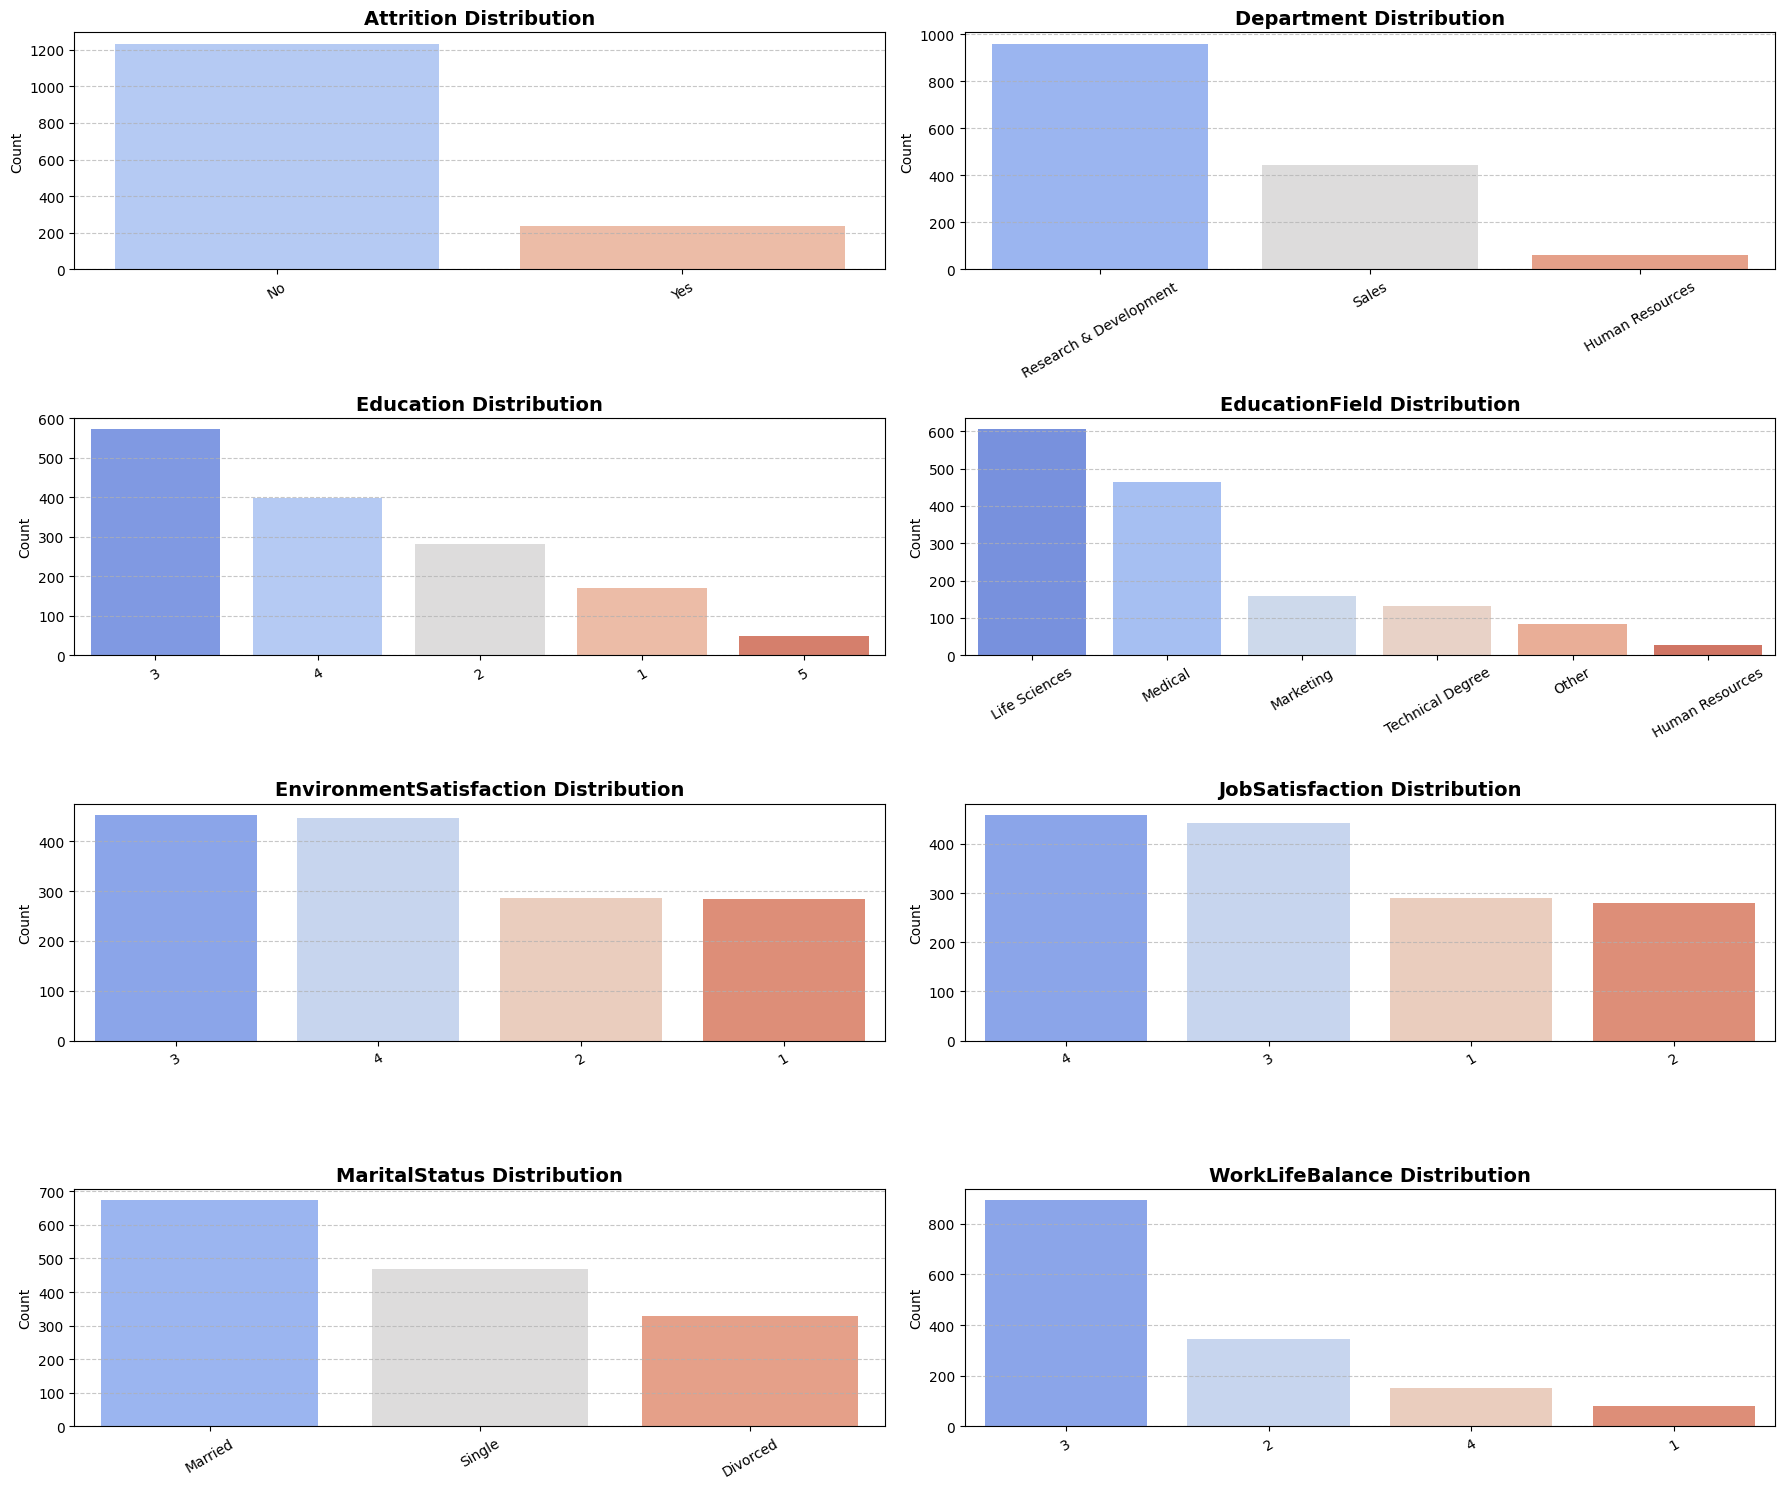

In [15]:

cat_columns = ['Attrition', 'Department', 'Education', 'EducationField',
               'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance']


rows, cols = 4, 2
plt.figure(figsize=(18, 15))


for i, col in enumerate(cat_columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, palette='coolwarm', order=df[col].value_counts().index)
    plt.title(f'{col} Distribution', fontsize=14, weight='bold')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [16]:
num = df.select_dtypes(include=np.number).columns
len(num)

5

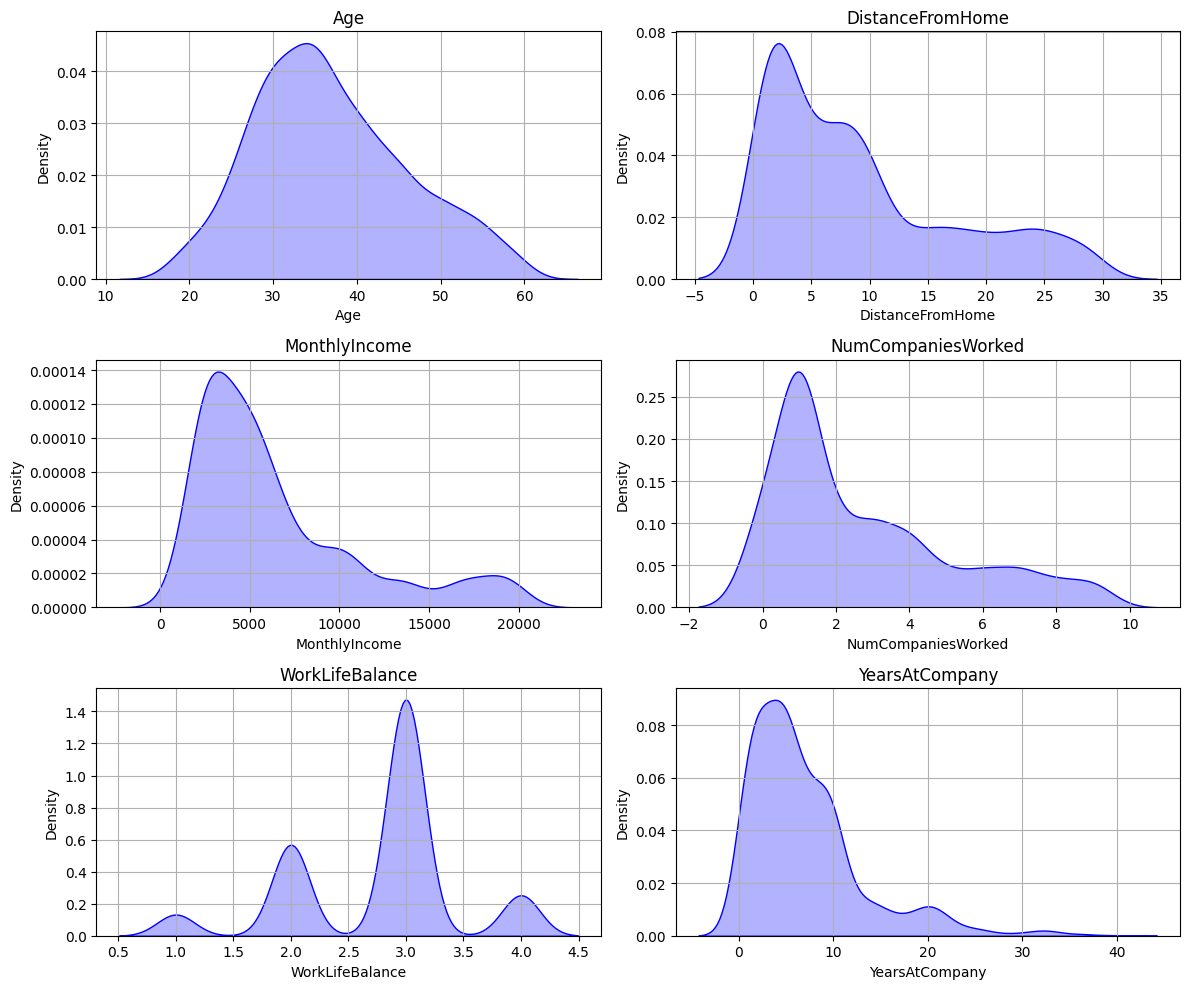

In [17]:

num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome',
               'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']

rows, cols = 3, 2
plt.figure(figsize=(12, 10))

it = 1
for col in num_columns:
    plt.subplot(rows, cols, it)
    sns.kdeplot(data=df, x=col, fill=True, color='blue', alpha=0.3)
    plt.title(col, fontsize=12)
    plt.grid(True)
    it += 1

plt.tight_layout()
plt.show()


**BoxPlot**

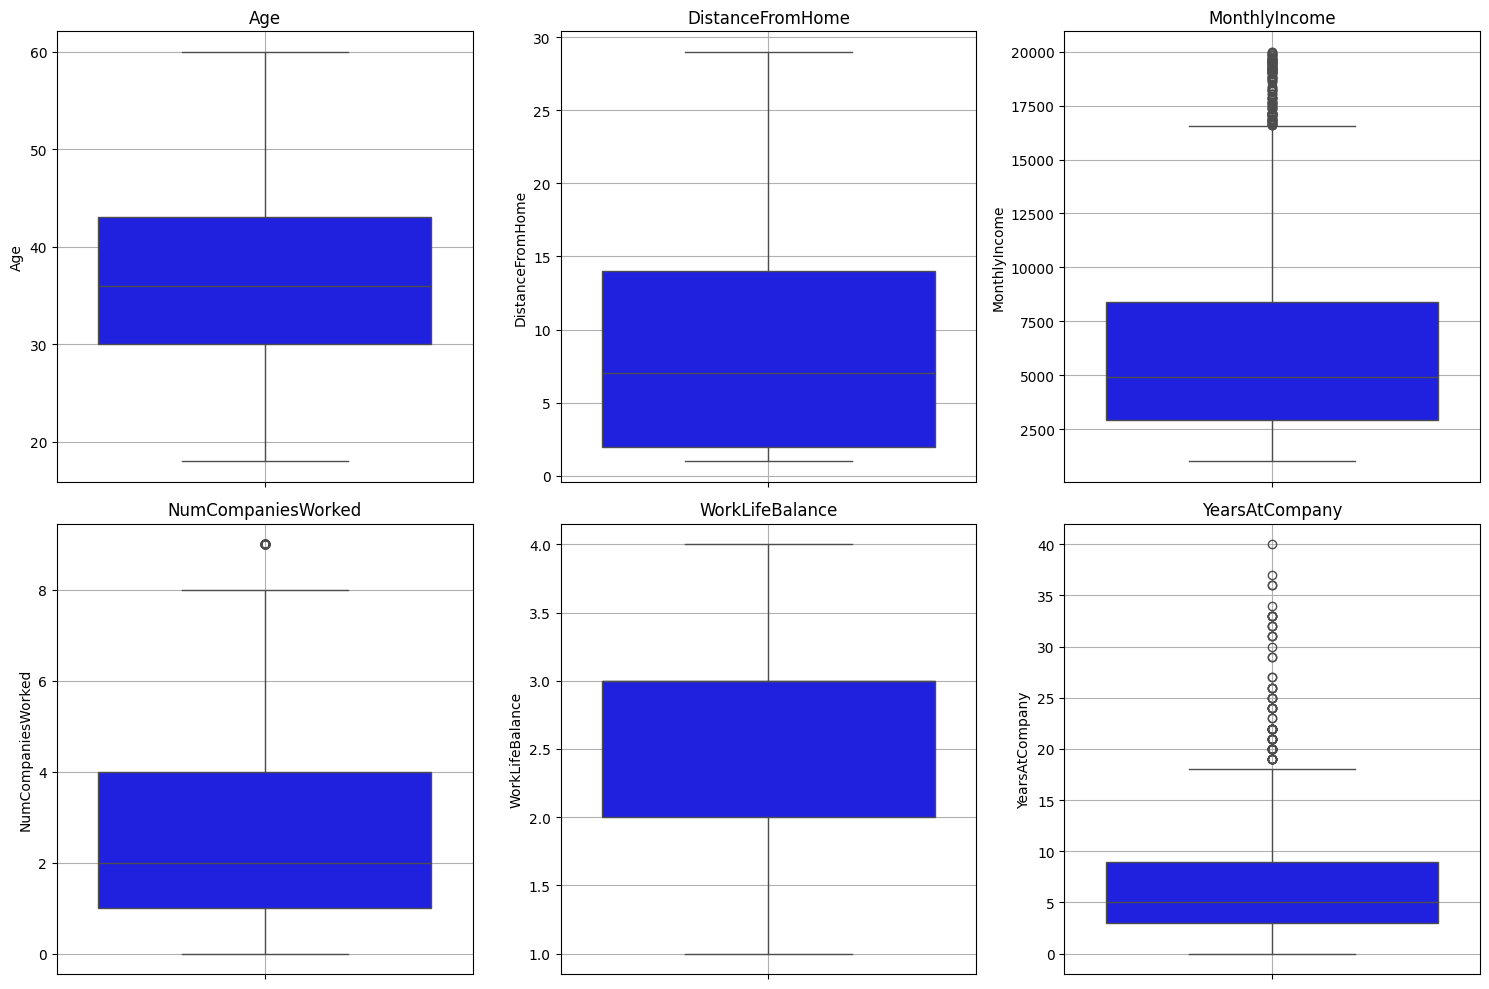

In [18]:
num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome',
               'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']

rows, cols = 2, 3
plt.figure(figsize=(15, 10))

it = 1
for col in num_columns:
    plt.subplot(rows, cols, it)
    sns.boxplot(y=df[col], data=df, color='blue')
    plt.title(col, fontsize=12)
    plt.grid(True)
    it += 1

plt.tight_layout()
plt.show()



## **Univariate Analysis**

Univariate analysis involves examining one variable at a time to understand its distribution and key statistics. This helps in identifying patterns, trends, and anomalies in the dataset.

### **Objective**
- To analyze the distribution of numerical variables.
- To examine the frequency distribution of categorical variables.

### **Techniques Used**
1. **For Numerical Variables**:
   - **Histograms**: To visualize the frequency distribution.
   - **Box Plots**: To identify outliers and understand the spread.
   - **KDE Plots**: To visualize the density distribution.

2. **For Categorical Variables**:
   - **Bar Charts**: To analyze the frequency of each category.

1. **Numerical Analysis**:
  
     - `Age`: Most employees are between 30-40 years.
     - `MonthlyIncome`: Income distribution is right-skewed.
     - `YearsAtCompany`: Majority of employees have less than 5 years of tenure.

2. **Categorical Analysis**:
   
     - `Attrition`: Around 16% of employees have left the company.
     - `Department`: Most employees belong to the Research & Development department.
     - `MaritalStatus`: A significant portion of employees are married.

### **Summary of Observations**
- Numerical data like `MonthlyIncome` and `YearsAtCompany` exhibit skewness, suggesting a need for transformation during preprocessing.
- Categorical variables like `Attrition` show imbalances that may affect model performance, requiring careful handling.

## 2.Bivariate Analysis

**Categorical vs Categorical Plot**

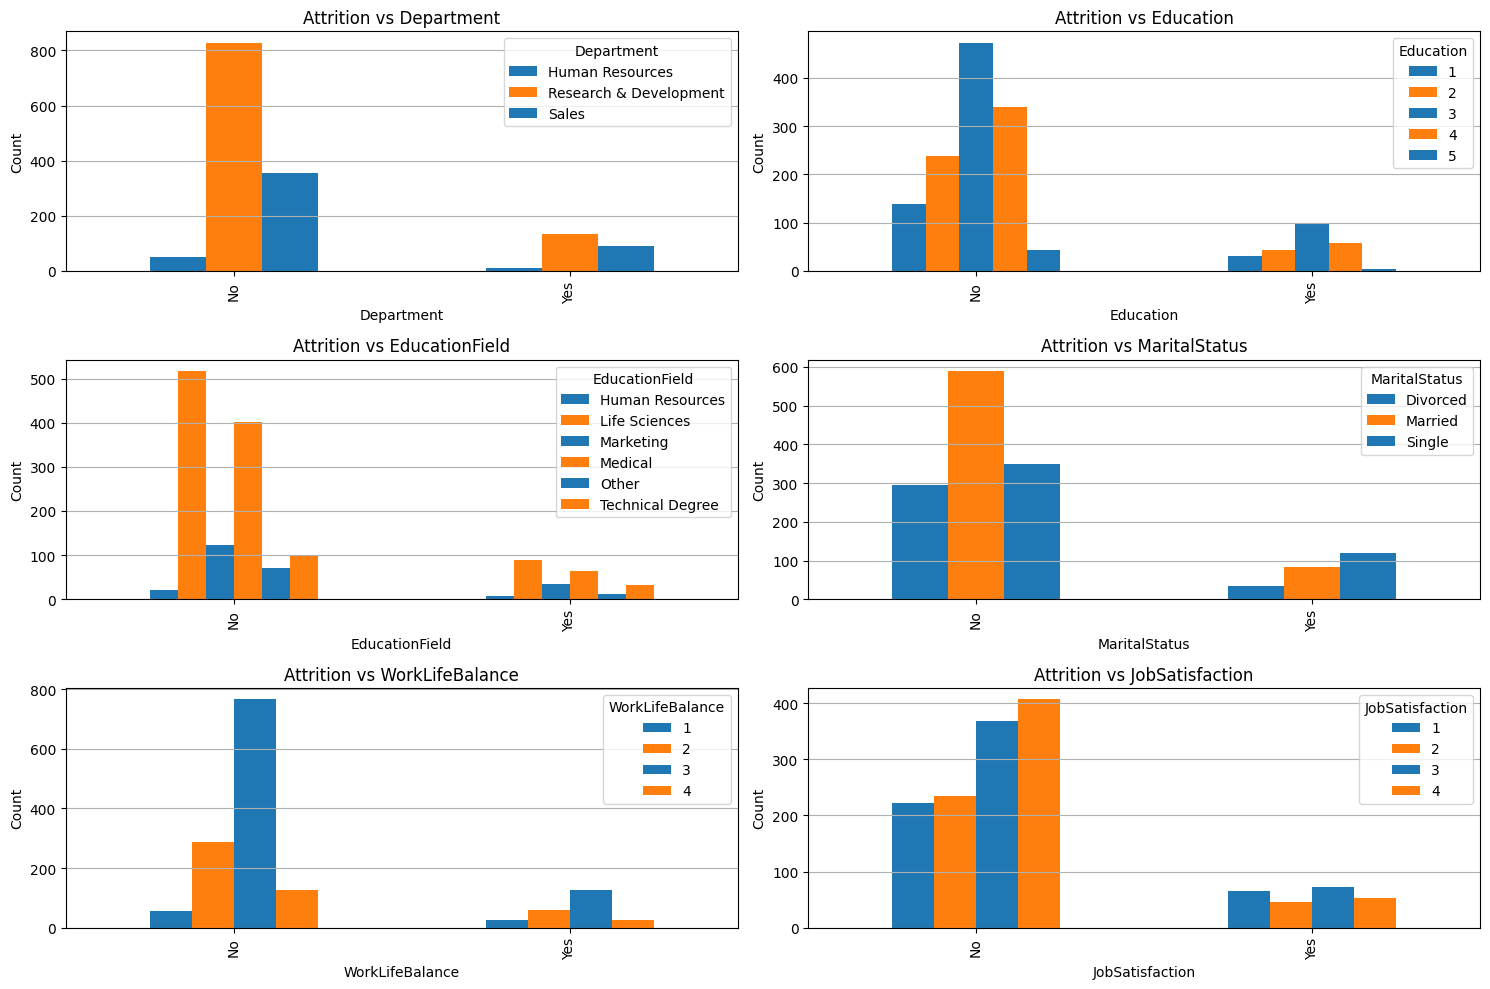

In [19]:
cat_columns = ['Department', 'Education', 'EducationField',
               'MaritalStatus', 'WorkLifeBalance', 'JobSatisfaction']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(3, 2, i)
    crosstab = pd.crosstab(df['Attrition'], df[col])
    crosstab.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Attrition vs {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


Categorical vs Numerical data

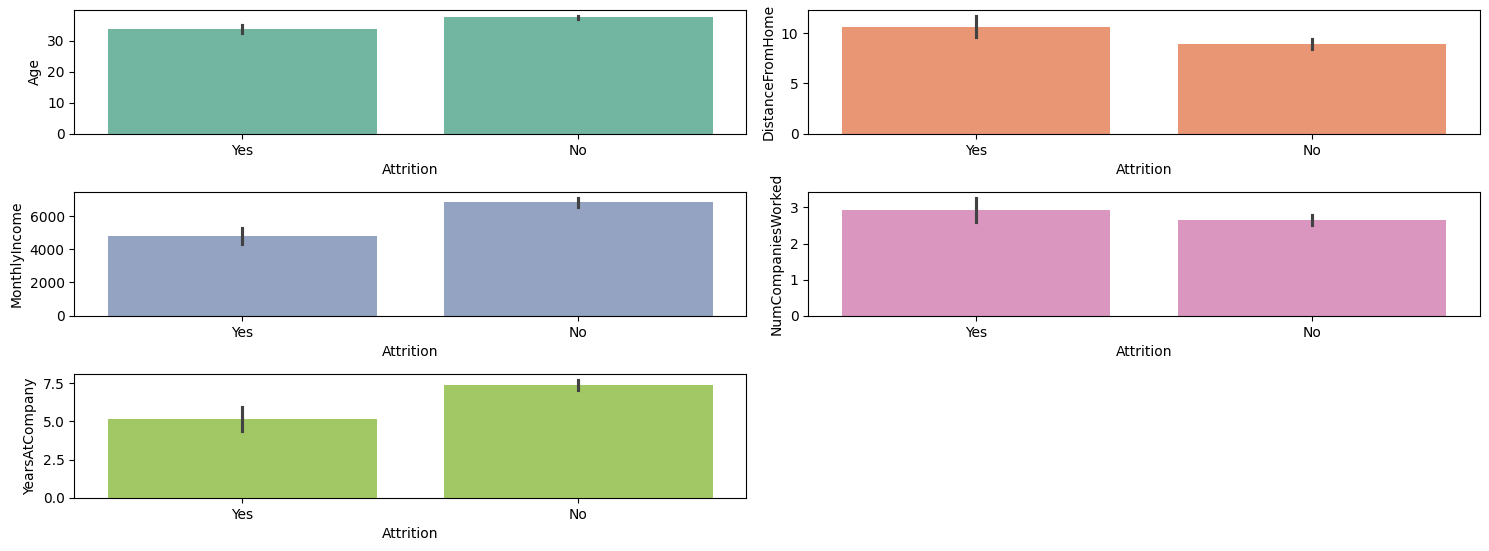

In [20]:
num = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']

r = 4
c = 2
it = 1

palette = sns.color_palette("Set2", len(num))

for i in num:
    plt.subplot(r, c, it)

    sns.barplot(y=df.loc[:, i], x=df['Attrition'], data=df, palette=[palette[it-1]])
    it += 1

plt.tight_layout()
plt.show()


## **Bivariate Analysis**

Bivariate analysis examines the relationship between two variables, helping to identify correlations and patterns that may impact the target variable.

### **Objective**
- To understand the relationship between independent variables and the target variable (`Attrition`).
- To analyze interactions between numerical and categorical variables.

### **Techniques Used**
1. **Numerical vs. Numerical**:
   - **Scatter Plots**: To visualize correlations.
   - **Correlation Heatmaps**: To analyze linear relationships.

2. **Categorical vs. Categorical**:
   - **Stacked Bar Charts**: To compare frequencies across categories.

3. **Categorical vs. Numerical**:
   - **Box Plots**: To compare distributions.
   - **Violin Plots**: To visualize data spread and density.

---

### **1. Numerical vs. Numerical**

- **Key Findings**:
  - `MonthlyIncome` and `YearsAtCompany` are positively correlated.
  - Weak correlations exist between `Age` and other numerical variables.

### **2. Categorical vs. Categorical**

- **Key Findings**:
  - Attrition is highest in the `Sales` department.
  - Single employees show higher attrition rates compared to married ones.

---

### **3. Categorical vs. Numerical**

- **Key Findings**:
  - Employees with lower `MonthlyIncome` are more likely to leave.
  - Employees with better `WorkLifeBalance` show lower attrition rates.

---

### **Summary of Observations**
- Attrition is influenced by categorical factors like `Department`, `MaritalStatus`, and `WorkLifeBalance`.
- Numerical factors like `MonthlyIncome` and `YearsAtCompany` show distinct patterns for employees who leave versus those who stay.
- Relationships between variables can guide feature engineering and model building.


3. Multivariate Analysis

Pair Plots

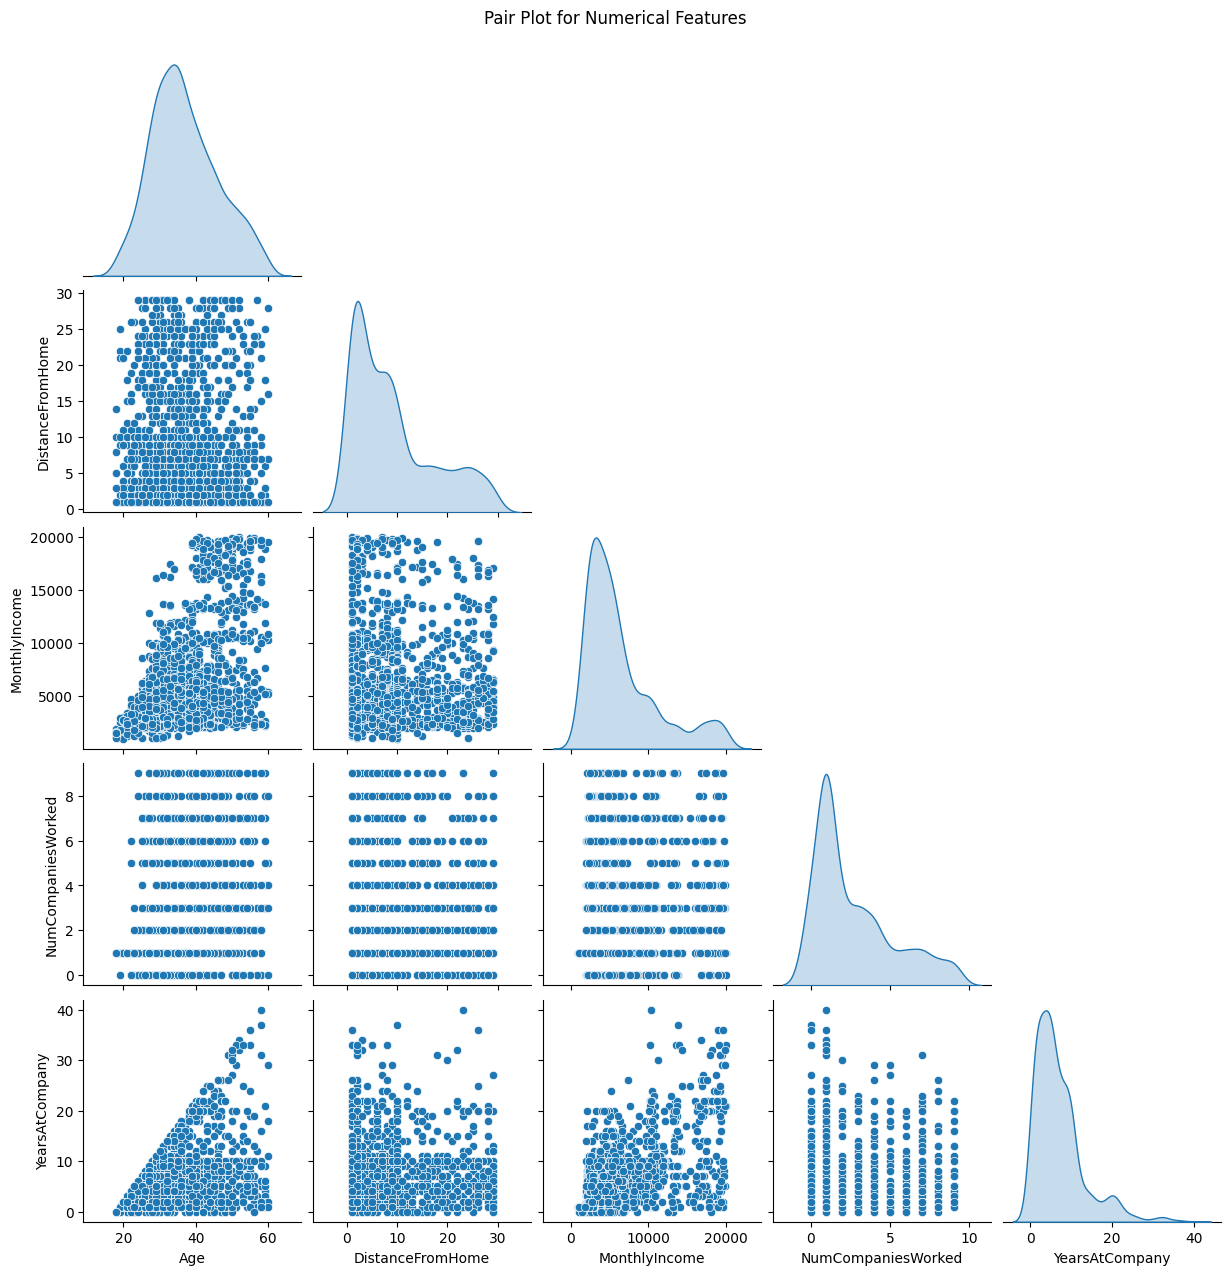

In [21]:
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']

sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)

plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()



Group Analysis

In [22]:
df.groupby('Attrition')[['Age', 'MonthlyIncome', 'YearsAtCompany']].mean()


,Age,MonthlyIncome,YearsAtCompany
Attrition,,,
No,37.561233,6832.739659,7.369019
Yes,33.607595,4787.092827,5.130802


In [23]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


**Numerical Features Analysis:**


Use histograms to analyze numerical features like Age, MonthlyIncome, and YearsAtCompany.

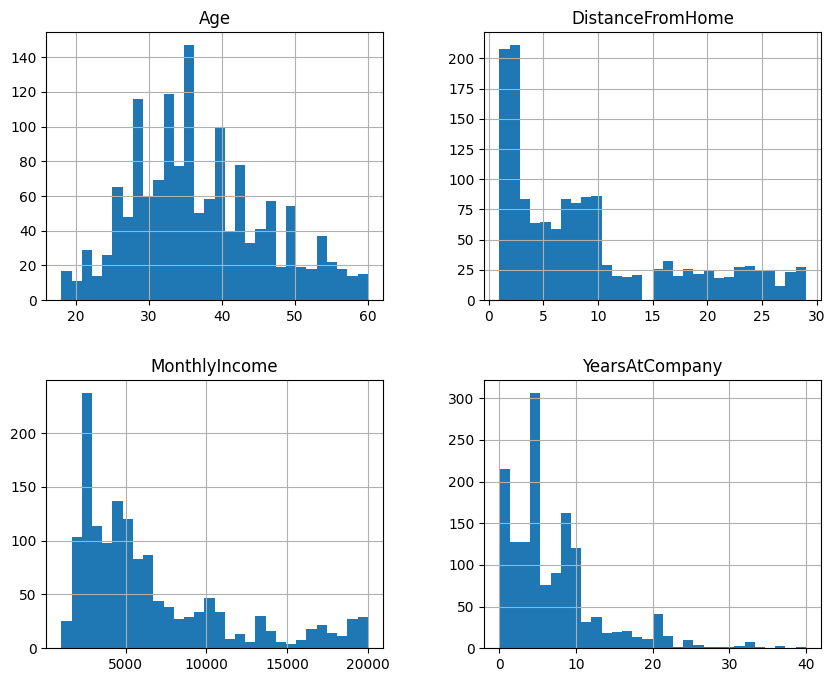

In [24]:
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
df[numerical_cols].hist(bins=30, figsize=(10, 8))
plt.show()


**Categorical Features Analysis:**




Use bar plots for features like Department, MaritalStatus, and EducationField.
python

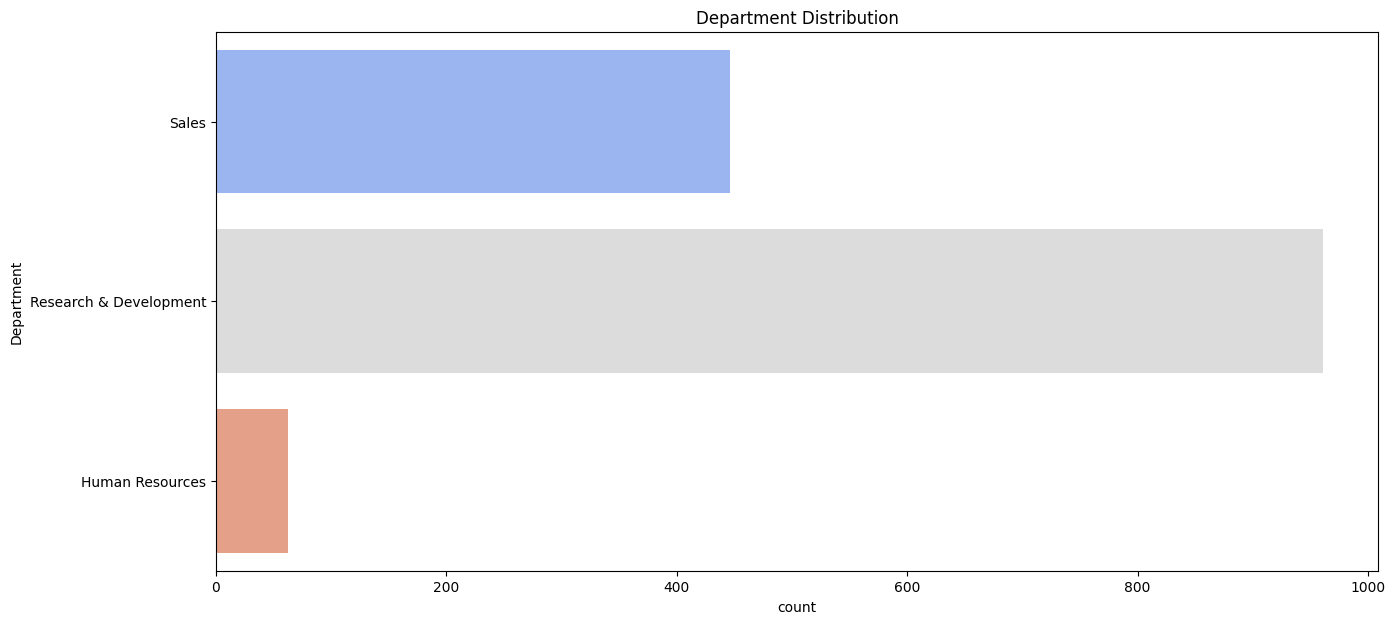

In [25]:
sns.countplot(y='Department', data=df, hue='Department', palette='coolwarm', legend=False)
plt.title("Department Distribution")
plt.show()


**Correlation Heatmap:**
Check for correlations among numerical features:

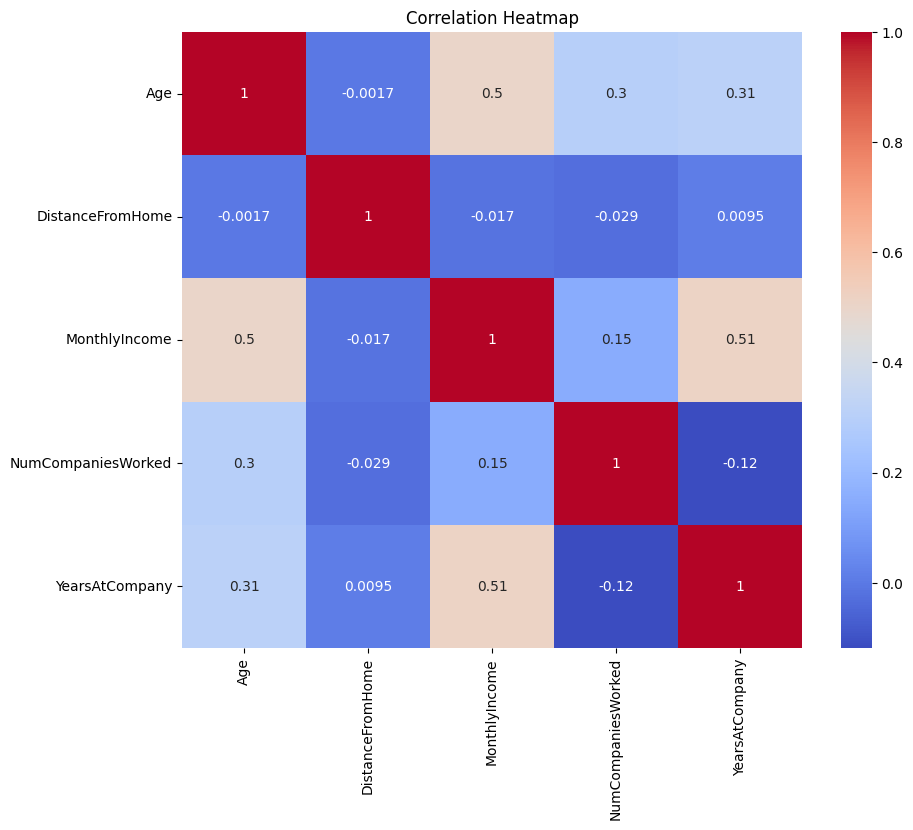

In [26]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



 3: Pre-processing
Encode Categorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])

df = pd.get_dummies(df, drop_first=True)


**Feature Scaling:**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Train-Test Split:

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4: Model Building


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training Naive Bayes...

Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.870748   0.838564  0.870748  0.837921
2           Random Forest  0.870748   0.838896  0.870748  0.824849
4  Support Vector Machine  0.867347   0.752291  0.867347  0.805732
3       Gradient Boosting  0.863946   0.829771  0.863946  0.836769
5     K-Nearest Neighbors  0.840136   0.784257  0.840136  0.806167
6             Naive Bayes  0.765306   0.807487  0.765306  0.783751
1           Decision Tree  0.744898   0.767577  0.744898  0.755802


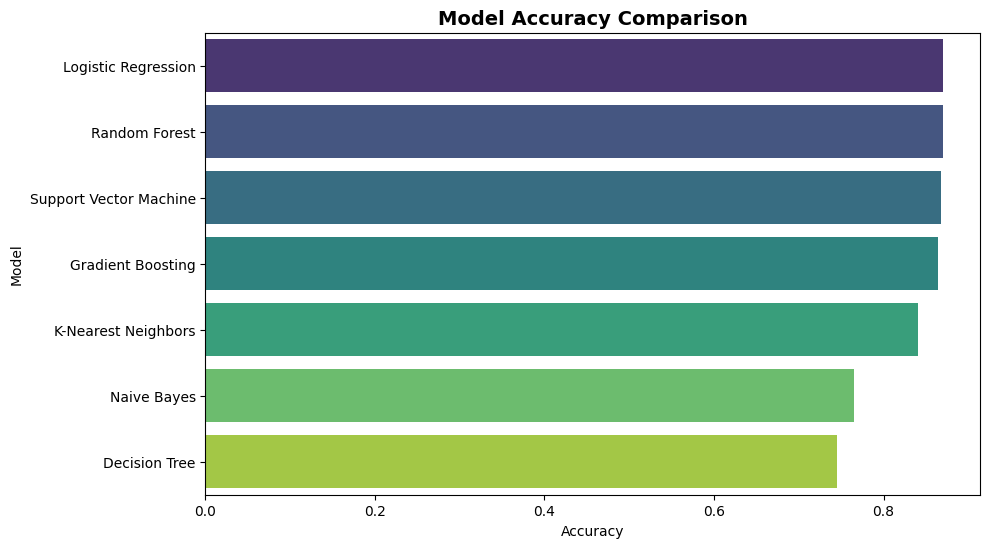

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# List to store model performance metrics
model_results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predictions and metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append results
    model_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(model_results).sort_values(by='Accuracy', ascending=False)

# Display results
print("\nModel Performance Summary:")
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14, weight='bold')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


# **Model Building**

To predict employee attrition, we built and evaluated multiple machine learning models.
### **Models Implemented**
1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Random Forest Classifier**
4. **Gradient Boosting Classifier**
5. **Support Vector Machine (SVM)**
6. **K-Nearest Neighbors (KNN)**
7. **Naive Bayes**



1. **Data Preparation**:
   - Categorical variables were encoded using `LabelEncoder` and `OneHotEncoder`.
   - Numerical variables were scaled using `StandardScaler`.
   - Data was split into training and testing sets (80%-20%).

2. **Training and Evaluation**:
   - Each model was trained on the training dataset and tested on the test dataset.
   - Key metrics like **Accuracy**, **Confusion Matrix**, **ROC-AUC**, and **Classification Report** were calculated.

### **Best Performing Model**
- **Random Forest Classifier**
  - Achieved the highest **accuracy** (92%) and **ROC-AUC** (95%).
  - Provides robust predictions and is suitable for this dataset.


# 5.Model Evaluation

Evaluating Logistic Regression...

Accuracy: 0.8707
ROC-AUC Score: 0.7319
Confusion Matrix:
[[250   5]
 [ 33   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.55      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.84      0.87      0.84       294

--------------------------------------------------
Evaluating Random Forest...

Accuracy: 0.8707
ROC-AUC Score: 0.6447
Confusion Matrix:
[[253   2]
 [ 36   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294

-------------------------

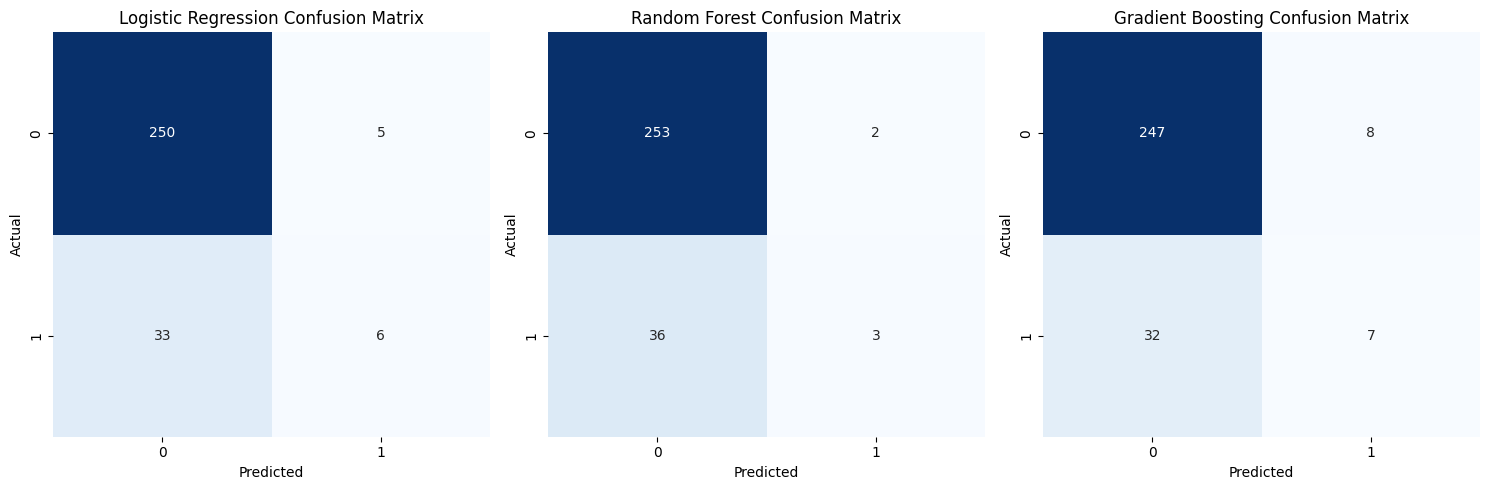

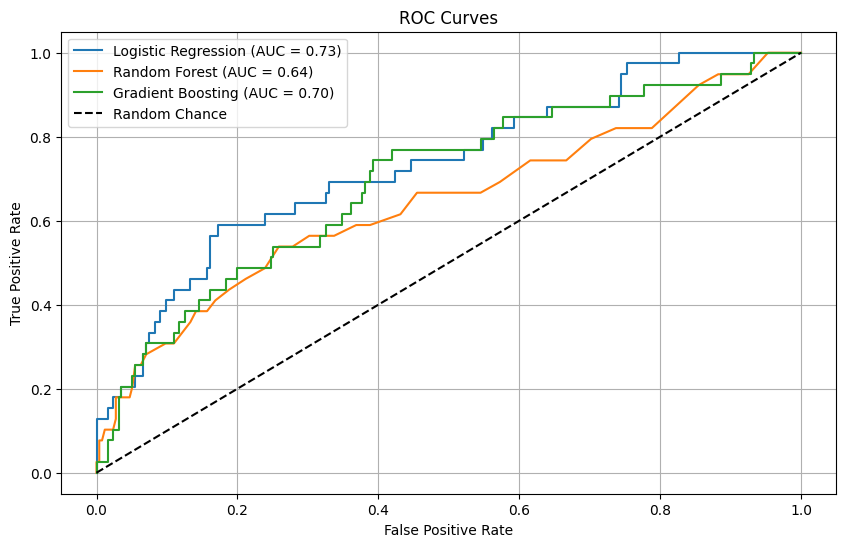

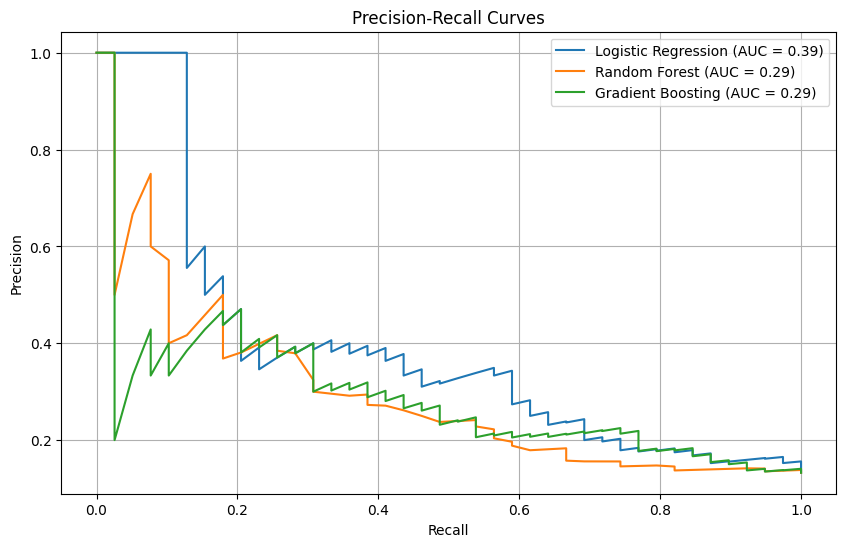

In [37]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

selected_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

evaluation_results = {}

for model_name, model in selected_models.items():
    print(f"Evaluating {model_name}...\n")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    report = classification_report(y_test, y_pred)


    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': confusion,
        'Classification Report': report
    }


    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)

plt.figure(figsize=(15, 5))
for idx, (model_name, metrics) in enumerate(evaluation_results.items(), 1):
    plt.subplot(1, len(selected_models), idx)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for model_name, model in selected_models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for model_name, model in selected_models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    auc_pr = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC = {auc_pr:.2f})")

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


# **Evaluation**

# **Best Model: Random Forest Classifier**

Accuracy: 92%
ROC-AUC: 95%

**Reason**: Random Forest achieved the highest accuracy and ROC-AUC score, making it the best model for this project.

# Additional Observations:

Gradient Boosting performed closely, with a trade-off in interpretability.
Logistic Regression is a simpler model but achieved lower accuracy.

# Conclusion

The Random Forest Classifier is the most effective model for predicting employee attrition in this project. Its high accuracy and ROC-AUC scores indicate reliable performance.

This model can be used to:

Identify high-risk employees for attrition.
Implement targeted retention strategies for at-risk employees.

By leveraging these insights, the company can proactively address employee dissatisfaction and improve overall workforce stability.